# Задача Бернштейна-Вазирани

$$f: \{0, 1\}^n \rightarrow \{0, 1\} $$

$$
    f(x) = s . x = s_{n-1} . x_{n-1} \oplus ... \oplus s_0 . x_0
$$

Требуется определить s?

В классическом случае требуется: $n$ операции

 <center>
    <img src="../images/bernstein-vazirani.png" width="520">
</center>

$U_f|x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle = |x\rangle|y \oplus (s.x)\rangle$

если $s = 0$, то $U_f|x\rangle|y\rangle = |x\rangle|y\rangle$

если $s = 1$, то $U_f|x\rangle|y\rangle = |x\rangle|y \oplus x\rangle = CX|x\rangle|y\rangle$

In [1]:
import qiskit
import qiskit_aer

s = '101'
n = len(s)

x = qiskit.QuantumRegister(n, 'x')
y = qiskit.QuantumRegister(1, 'y')

c = qiskit.ClassicalRegister(n)

bv = qiskit.QuantumCircuit(x, y, c)

for i in range(n):
    bv.h(i)

bv.x(n)
bv.h(n)

bv.barrier()

t = s[::-1]

for i in range(n):
    if t[i] == '1':
        bv.cx(i, n)

bv.barrier()

for i in range(n):
    bv.h(i)

for i in range(n):
    bv.measure(i, i)

bv.draw()

┌───┐      ░            ░ ┌───┐┌─┐      
 x_0: ┤ H ├──────░───■────────░─┤ H ├┤M├──────
      ├───┤      ░   │        ░ ├───┤└╥┘┌─┐   
 x_1: ┤ H ├──────░───┼────────░─┤ H ├─╫─┤M├───
      ├───┤      ░   │        ░ ├───┤ ║ └╥┘┌─┐
 x_2: ┤ H ├──────░───┼────■───░─┤ H ├─╫──╫─┤M├
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║ └╥┘
   y: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫──╫─
      └───┘└───┘ ░ └───┘└───┘ ░       ║  ║  ║ 
c0: 3/════════════════════════════════╩══╩══╩═
                                      0  1  2

In [4]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(bv).result()

counts = result.get_counts(bv)

counts

{'101': 1024}

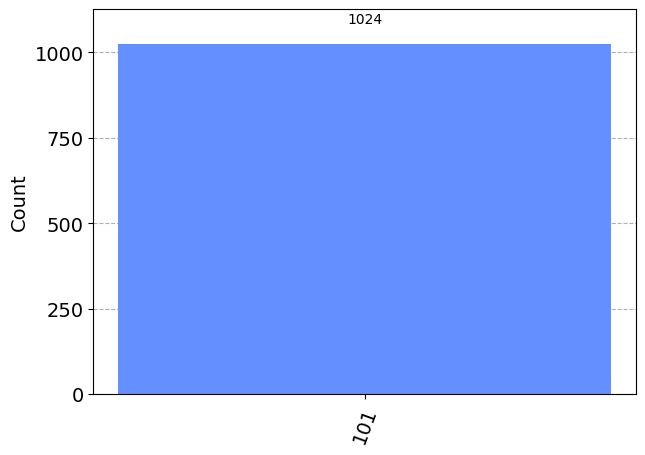

In [5]:
qiskit.visualization.plot_histogram(counts)